In [ ]:
"""
Maxwell Zheng 1004907871
Google Colab: https://colab.research.google.com/drive/1oZ2BCZhvUWJN0bsai1TI4jnzsEWOcau4?usp=sharing
"""

In [1]:
import csv
import numpy as np
import random
import torch
import torch.utils.data
import pandas as pd

In [34]:
header = ["age", "work", "fnlwgt", "edu", "yredu", "marriage", "occupation", "relationship", "race", "sex", "capgain", "caploss", "workhr", "country"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=header, index_col=False)
df.shape

(32561, 14)

In [8]:
# 1a 

df[:3]

,age,work,fnlwgt,edu,yredu,marriage,occupation,relationship,race,sex,capgain,caploss,workhr,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


In [7]:
subdf = df[["age", "yredu", "capgain", "caploss", "workhr"]]
subdf[:3]

,age,yredu,capgain,caploss,workhr
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40


In [9]:
np.sum(subdf["caploss"])

2842700

In [35]:
df["age"] += 1
df

,age,work,fnlwgt,edu,yredu,marriage,occupation,relationship,race,sex,capgain,caploss,workhr,country
0,40,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,51,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,39,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,54,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,29,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,38,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,50,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,53,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,32,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,43,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [36]:
df["age"] -= 1 # undo previous changes to age

In [26]:
# 1b

males = sum(df["sex"] == " Male")
females = sum(df["sex"] == " Female")

total = males + females

print("Percentage of Males: ", males/total)
print("Percentage of females: ", females/total)

Percentage of Males:  0.6692054912318418
Percentage of females:  0.33079450876815825


In [21]:
# 1c

contcols = ["age", "yredu", "capgain", "caploss", "workhr"]
catcols = ["work", "marriage", "occupation", "edu", "relationship", "sex"]

features = contcols + catcols
df = df[features]

missing = pd.concat([df[c] == " ?" for c in catcols], axis=1).any(axis=1)
dfWithMissing = df[missing]
dfNotMissing = df[~missing]

missingNum = len(dfWithMissing)
total = missingNum + len(dfNotMissing)

print("Number of records containing missing features: ", missingNum)
print("Percentage of records removed: ", missingNum/total)

Number of records containing missing features:  1843
Percentage of records removed:  0.056601455729246644


In [22]:
# 1d

workValues = set(dfNotMissing["work"])
print(workValues)

{' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Private', ' Federal-gov', ' Local-gov', ' Without-pay'}


In [37]:
data = pd.get_dummies(dfNotMissing)
data[:3]

,age,yredu,capgain,caploss,workhr,work_ Federal-gov,work_ Local-gov,work_ Private,work_ Self-emp-inc,work_ Self-emp-not-inc,...,edu_ Prof-school,edu_ Some-college,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,40,13,2174,0,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,51,13,0,0,13,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,39,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
# 1 e

print(data.shape[1])

"""
There should be 11 columns for contcols and catcols. However, this includes the relationships within 
those categories
"""

57


In [41]:
# 1f

datanp=data.values.astype(np.float32)

In [42]:
catIndex = {}
catValues = {}

for i, header in enumerate(data.keys()):
    if "_" in header:
        feature, value = header.split()
        feature = feature[:-1]
        if feature not in catIndex:
            catIndex[feature] = i
            catValues[feature] = [value]
        else:
            catValues[feature].append(value)

In [68]:
def getOnehot(record, feature):
    startIndex = catIndex[feature]
    stopIndex = catIndex[feature] + len(catValues[feature])
    
    return record[startIndex:stopIndex]

In [45]:
def getCategoricalValue(onehot, feature):
    ind = np.argmax(onehot)
    values = catValues[feature]
    
    return values[ind]

In [46]:
def getFeature(record, feature):
    onehot = getOnehot(record, feature)
    return getCategoricalValue(onehot, feature)

In [47]:
def getFeatures(record):
    return {f:getFeature(record, f) for f in catcols}

In [49]:
getCategoricalValue(np.array([0.1, 0., 1.1, 0.2, 0., 1., 0.]), "work")

'Private'

In [50]:
getCategoricalValue(np.array([0., 0., 0., 0., 0., 1., 0.]), "work")

'State-gov'

In [52]:
# 1g

np.random.seed(50)

np.random.shuffle(datanp)
totalData = list(datanp)

trainSet = totalData[:21502]
valSet = totalData[21502:26110]
testSet = totalData[26110:30718]

In [64]:
# 2a

from torch import nn

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.name = "net"
        self.encoder = nn.Sequential(nn.Linear(57, 40), nn.Linear(40, 20))
        self.decoder = nn.Sequential(nn.Linear(20, 40), nn.Linear(40, 57), nn.Sigmoid())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# 2b

"""
There needed a sigmoid activation in order to normalize the value into the range 0 and 1
"""

In [57]:
# 3a

def zeroOutFeature(records, feature):
    startIndex = catIndex[feature]
    stopIndex = catIndex[feature] + len(catValues[feature])
    records[:, startIndex:stopIndex] = 0
    
    return records

In [58]:
def zeroOutRandomFeature(records):
    
    return zeroOutFeature(records, random.choice(catcols))

In [75]:
def getModelName(name, batchSize, learningRate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batchSize, learningRate, epoch)
    
    return path
    

In [81]:
def train(model, trainLoader, valLoader, numEpochs=5, batchSize=64, learningRate=0.01):
    import time
    torch.manual_seed(42)
    
    criterion=nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
    
    trainAcc, valAcc = [], []
    
    startTime = time.time()
    for epoch in range(numEpochs):
        for data in trainLoader:
            datam = zeroOutRandomFeature(data.clone())
            recon = model(datam)
            loss = criterion(recon, data)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        trainAcc.append(getAccuracy(model, trainLoader))
        valAcc.append(getAccuracy(model, valLoader))   
        
        print(("Epoch {}: Train Acc: {}| Validation Acc: {}").format(epoch+1, trainAcc[epoch], valAcc[epoch]))
        
        modelPath = getModelName(model.name, batchSize, learningRate, epoch)
        #torch.save(model.state_dict(), modelPath)
              
    print("Training Done")
    
    endTime = time.time()
    timeElapsed = endTime - startTime
    print(f"Training time: {timeElapsed:.2f}")
    
    epochs = np.arange(1, numEpochs+1)
    np.savetxt("{}_train_acc.csv".format(modelPath), trainAcc)
    np.savetxt("{}_val_acc.csv".format(modelPath), valAcc)

        

In [66]:
# 3b

def getAccuracy(model, dataLoader):
    
    total = 0
    acc = 0
    for col in catcols:
        for item in dataLoader:
            inp = item.detach().numpy()
            out = model(zeroOutFeature(item.clone(), col)).detach().numpy()
            for i in range(out.shape[0]):
                acc += int(getFeature(out[i], col) == getFeature(inp[i], col))
                total += 1
    
    return acc / total

In [91]:
def plotTrainingCurve(path):
    
    import matplotlib.pyplot as plt
    
    trainAcc = np.loadtxt("{}_train_acc.csv".format(path))
    valAcc = np.loadtxt("{}_val_acc.csv".format(path))
    
    n = len(trainAcc)
    
    plt.title("Train vs Validation Accuracy")
    plt.plot(range(1,n+1), trainAcc, label="Train")
    plt.plot(range(1,n+1), valAcc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()

In [82]:
batchSize = 64

trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=batchSize, num_workers=1)
valLoader = torch.utils.data.DataLoader(valSet, batch_size=batchSize, num_workers=1)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=batchSize, num_workers=1)

autoEncoder = AutoEncoder()

train(autoEncoder, trainLoader, valLoader, numEpochs=30, batchSize=64, learningRate=0.001)

Epoch 1: Train Acc: 0.4735605990140452| Validation Acc: 0.4708116319444444
Epoch 2: Train Acc: 0.5187579449973646| Validation Acc: 0.5171802662037037
Epoch 3: Train Acc: 0.5427014541282982| Validation Acc: 0.5395326967592593
Epoch 4: Train Acc: 0.5538089480048367| Validation Acc: 0.5487557870370371
Epoch 5: Train Acc: 0.5748147459151087| Validation Acc: 0.5709273726851852
Epoch 6: Train Acc: 0.5719235419960934| Validation Acc: 0.5682146990740741
Epoch 7: Train Acc: 0.5745667069729947| Validation Acc: 0.5732060185185185
Epoch 8: Train Acc: 0.5854416643413016| Validation Acc: 0.5836950231481481
Epoch 9: Train Acc: 0.5947508758875143| Validation Acc: 0.5920138888888888
Epoch 10: Train Acc: 0.5966886801227793| Validation Acc: 0.5895543981481481
Epoch 11: Train Acc: 0.592882832604719| Validation Acc: 0.5898799189814815
Epoch 12: Train Acc: 0.5972467677425356| Validation Acc: 0.5950520833333334
Epoch 13: Train Acc: 0.5938284810715282| Validation Acc: 0.5924479166666666
Epoch 14: Train Acc: 0

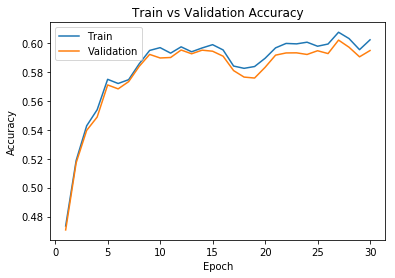

In [92]:
plotTrainingCurve(getModelName("net", 64, 0.001, 29))

In [94]:
# 3d

autoEncoder = AutoEncoder()
train(autoEncoder, trainLoader, valLoader, numEpochs=30, learningRate=0.0001)

Epoch 1: Train Acc: 0.43395963166217094| Validation Acc: 0.43406394675925924
Epoch 2: Train Acc: 0.4405404148451307| Validation Acc: 0.4419849537037037
Epoch 3: Train Acc: 0.4411295073326512| Validation Acc: 0.4431423611111111
Epoch 4: Train Acc: 0.44318357982203205| Validation Acc: 0.44534866898148145
Epoch 5: Train Acc: 0.45355470808917| Validation Acc: 0.45511429398148145
Epoch 6: Train Acc: 0.4579263944439277| Validation Acc: 0.46090133101851855
Epoch 7: Train Acc: 0.45624438036771775| Validation Acc: 0.4584056712962963
Epoch 8: Train Acc: 0.4647474653520603| Validation Acc: 0.4671585648148148
Epoch 9: Train Acc: 0.4819009084426255| Validation Acc: 0.4833984375
Epoch 10: Train Acc: 0.49929463925836354| Validation Acc: 0.5003616898148148
Epoch 11: Train Acc: 0.5118283570520572| Validation Acc: 0.5152633101851852
Epoch 12: Train Acc: 0.5243078163271634| Validation Acc: 0.5264395254629629
Epoch 13: Train Acc: 0.5336945400427867| Validation Acc: 0.5353370949074074
Epoch 14: Train Acc: 

In [ ]:
# Learning rate is too small so accuracy increases too slow. Will increase learning rate next

In [96]:
autoEncoder = AutoEncoder()
train(autoEncoder, trainLoader, valLoader, numEpochs=30, learningRate=0.01)

Epoch 1: Train Acc: 0.48218770346944473| Validation Acc: 0.48050491898148145
Epoch 2: Train Acc: 0.5311908969708244| Validation Acc: 0.5266203703703703
Epoch 3: Train Acc: 0.5463987846091837| Validation Acc: 0.5435836226851852
Epoch 4: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 5: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 6: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 7: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 8: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 9: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 10: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 11: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 12: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259
Epoch 13: Train Acc: 0.12551545592658048| Validation Acc: 0.11993634259259259

In [ ]:
# Now learning rate is too large and the accuracy is too low. Will keep at 0.001. Will test batch size next

In [97]:
batchSize = 128
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=batchSize, num_workers=1)
valLoader = torch.utils.data.DataLoader(valSet, batch_size=batchSize, num_workers=1)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=batchSize, num_workers=1)

autoEncoder = AutoEncoder()
train(autoEncoder, trainLoader, valLoader, numEpochs=30, batchSize=128, learningRate=0.001)

Epoch 1: Train Acc: 0.4369593526183611| Validation Acc: 0.4350043402777778
Epoch 2: Train Acc: 0.4711577217623167| Validation Acc: 0.4699435763888889
Epoch 3: Train Acc: 0.4961321427464112| Validation Acc: 0.4942491319444444
Epoch 4: Train Acc: 0.5267882057483024| Validation Acc: 0.5266203703703703
Epoch 5: Train Acc: 0.5440811707438068| Validation Acc: 0.5431495949074074
Epoch 6: Train Acc: 0.5489411837658512| Validation Acc: 0.5460792824074074
Epoch 7: Train Acc: 0.5616686819830713| Validation Acc: 0.5577980324074074
Epoch 8: Train Acc: 0.5723808637956159| Validation Acc: 0.5713252314814815
Epoch 9: Train Acc: 0.5867671224382228| Validation Acc: 0.5849971064814815
Epoch 10: Train Acc: 0.5770781012618981| Validation Acc: 0.5748336226851852
Epoch 11: Train Acc: 0.5687998015688464| Validation Acc: 0.5632595486111112
Epoch 12: Train Acc: 0.5743186680308808| Validation Acc: 0.5671296296296297
Epoch 13: Train Acc: 0.5777214522680061| Validation Acc: 0.5741102430555556
Epoch 14: Train Acc: 

In [ ]:
# Will test with even higher batch size next

In [98]:
batchSize = 256
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=batchSize, num_workers=1)
valLoader = torch.utils.data.DataLoader(valSet, batch_size=batchSize, num_workers=1)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=batchSize, num_workers=1)

autoEncoder = AutoEncoder()
train(autoEncoder, trainLoader, valLoader, numEpochs=30, batchSize=128, learningRate=0.001)

Epoch 1: Train Acc: 0.43277369547018885| Validation Acc: 0.43051938657407407
Epoch 2: Train Acc: 0.4391917030973863| Validation Acc: 0.4361979166666667
Epoch 3: Train Acc: 0.4483148854370136| Validation Acc: 0.4476996527777778
Epoch 4: Train Acc: 0.4758162031438936| Validation Acc: 0.4743923611111111
Epoch 5: Train Acc: 0.48980714972250644| Validation Acc: 0.48781105324074076
Epoch 6: Train Acc: 0.5051778129166279| Validation Acc: 0.5022424768518519
Epoch 7: Train Acc: 0.5206879980156884| Validation Acc: 0.5160228587962963
Epoch 8: Train Acc: 0.5336945400427867| Validation Acc: 0.5305266203703703
Epoch 9: Train Acc: 0.5398567575109292| Validation Acc: 0.5370008680555556
Epoch 10: Train Acc: 0.5420581031221902| Validation Acc: 0.5390263310185185
Epoch 11: Train Acc: 0.5488636715964407| Validation Acc: 0.5452835648148148
Epoch 12: Train Acc: 0.5571574737233745| Validation Acc: 0.5551938657407407
Epoch 13: Train Acc: 0.5630328961646979| Validation Acc: 0.5588831018518519
Epoch 14: Train A

In [ ]:
# 4a

"""
The test accuracy for the last model ends around 0.58
"""

In [ ]:
# 4b

"""
The test accuracy would just be the original percentage in 1c (0.056)
"""

In [ ]:
# 4c
"""
The test accuracy from part a () is much higher than 0.056
"""

In [ ]:
# 4d
"""
No it's not reasonable since there is no relationship between the attributes
"""

In [ ]:
# 4e

"""
There is no prediction
"""

In [ ]:
# 4f

"""
There is no prediction
"""